In [4]:
## !pip install pm4py

In [5]:
import pm4py
import pandas as pd

### Event Log 불러오기

In [6]:
# 실습용 데이터 호출
init_log = pd.read_csv("D:\Dropbox\PROJECT\LG_Training\eventlog (2).csv")
print(init_log.columns)
init_log.head(3)

Index(['CustomerID', 'PAGE_NAME', 'TIMESTAMP', 'AgeCategory_x', 'Gender_x',
       'ComplaintTopicID'],
      dtype='object')


,CustomerID,PAGE_NAME,TIMESTAMP,AgeCategory_x,Gender_x,ComplaintTopicID
0,2025826,50plus,2015-10-05 10:12:56.880,50-65,M,59.0
1,1503890,aanvragen-tw,2015-09-01 19:35:06.707,50-65,V,20.0
2,2063574,50plus,2015-11-06 10:47:42.137,40-49,M,33.0


- Customer ID와 TimeStamp의 Data Type을 변경
    - Customer ID : int64 --> object
    - Timestamp : object  --> datetime


### Event Log Data Type 확인 및 조정

- Data Type 확인

In [7]:
init_log.dtypes

CustomerID            int64
PAGE_NAME            object
TIMESTAMP            object
AgeCategory_x        object
Gender_x             object
ComplaintTopicID    float64
dtype: object

- Data Type 조정 (Customer ID)

In [8]:
init_log['CustomerID'] = init_log['CustomerID'].astype(str)
init_log.dtypes

CustomerID           object
PAGE_NAME            object
TIMESTAMP            object
AgeCategory_x        object
Gender_x             object
ComplaintTopicID    float64
dtype: object

> 실습1> 판다스를 활용해 TIMESTAMP를 시간 형태로 변환


In [9]:
# pandas.to_datetime() : 데이터 타입을 시간형태로 변환

init_log['TIMESTAMP'] = pd.to_datetime(init_log['TIMESTAMP'])
init_log.dtypes

CustomerID                  object
PAGE_NAME                   object
TIMESTAMP           datetime64[ns]
AgeCategory_x               object
Gender_x                    object
ComplaintTopicID           float64
dtype: object

### 판다스 데이터프레임을 이벤트 로그로 변환

- pm4py.format_dataframe() <br/><br/>
:param: df<br/>
:param: case_id<br/>
:param: activity_key<br/>
:param: timestamp_key<br/>
:return: Event Log

In [10]:
# 경고메세지 무시용
import warnings
warnings.filterwarnings('ignore') 


eventlog = pm4py.format_dataframe(df= init_log,
                                  case_id= 'CustomerID',
                                  activity_key= 'PAGE_NAME',
                                  timestamp_key= 'TIMESTAMP')

eventlog.head(3)

,CustomerID,PAGE_NAME,TIMESTAMP,AgeCategory_x,Gender_x,ComplaintTopicID,case:concept:name,concept:name,time:timestamp,@@index
0,1000178,taken,2016-01-07 01:30:16.967,50-65,M,20.0,1000178,taken,2016-01-07 01:30:16.967,0
1,1000184,taken,2015-07-29 10:25:07.700,18-29,M,20.0,1000184,taken,2015-07-29 10:25:07.700,1
2,1000184,mijn_bewijs_van_inschrijving,2015-10-21 08:39:50.823,30-39,M,62.0,1000184,mijn_bewijs_van_inschrijving,2015-10-21 08:39:50.823,2


### Event Log Filtering

In [11]:
activities = pm4py.get_attribute_values(eventlog,
                                        attribute='PAGE_NAME')

print(activities)

{'taken': 11114, 'vacatures_zoeken': 10246, 'mijn_werkmap': 6643, 'mijn_berichten': 4926, 'wdo': 4114, 'mijn_cv': 3724, 'mijn_sollicitaties': 3151, 'mijn_online_trainingen': 2171, 'foutopgetreden.html': 1435, 'home': 1286, 'timeout.htm': 1054, 'mijn_bewijs_van_inschrijving': 872, 'wijziging_doorgeven': 842, 'mijn_documenten': 798, 'Portal (ignore_request_page)': 685, 'sollicitatie-wijziging': 542, 'mijn_tips': 355, 'mijn_rechten_en_plichten': 222, 'inschrijven': 161, 'mijn_agenda': 155, 'mijn_netwerk': 114, 'wdo211832': 101, 'werk-zoeken': 81, 'handleiding': 79, 'evenement': 66, 'PORTAL.wwsec_app_priv.logout': 60, 'onderhoud.htm': 32, 'cv-plaatsen': 29, 'tip-van-de-week': 25, 'mijn_taken': 16, 'ontslag': 16, 'over-werk-nl': 15, 'wederzijds-goedvinden': 14, 'gegevens': 7, '50plus': 6, 'werkmap': 6, 'bijstandsuitkering': 6, 'uwv': 5, 'PORTAL.wwpob_smd.login2': 5, 'ignore_request_page': 5, 'nieuwsbericht': 5, 'wdo214236': 4, 'rechtbijstand': 4, 'transitievergoeding': 3, 'regelen': 3, 'aan

- Discover Petri Net with Inductive Miner

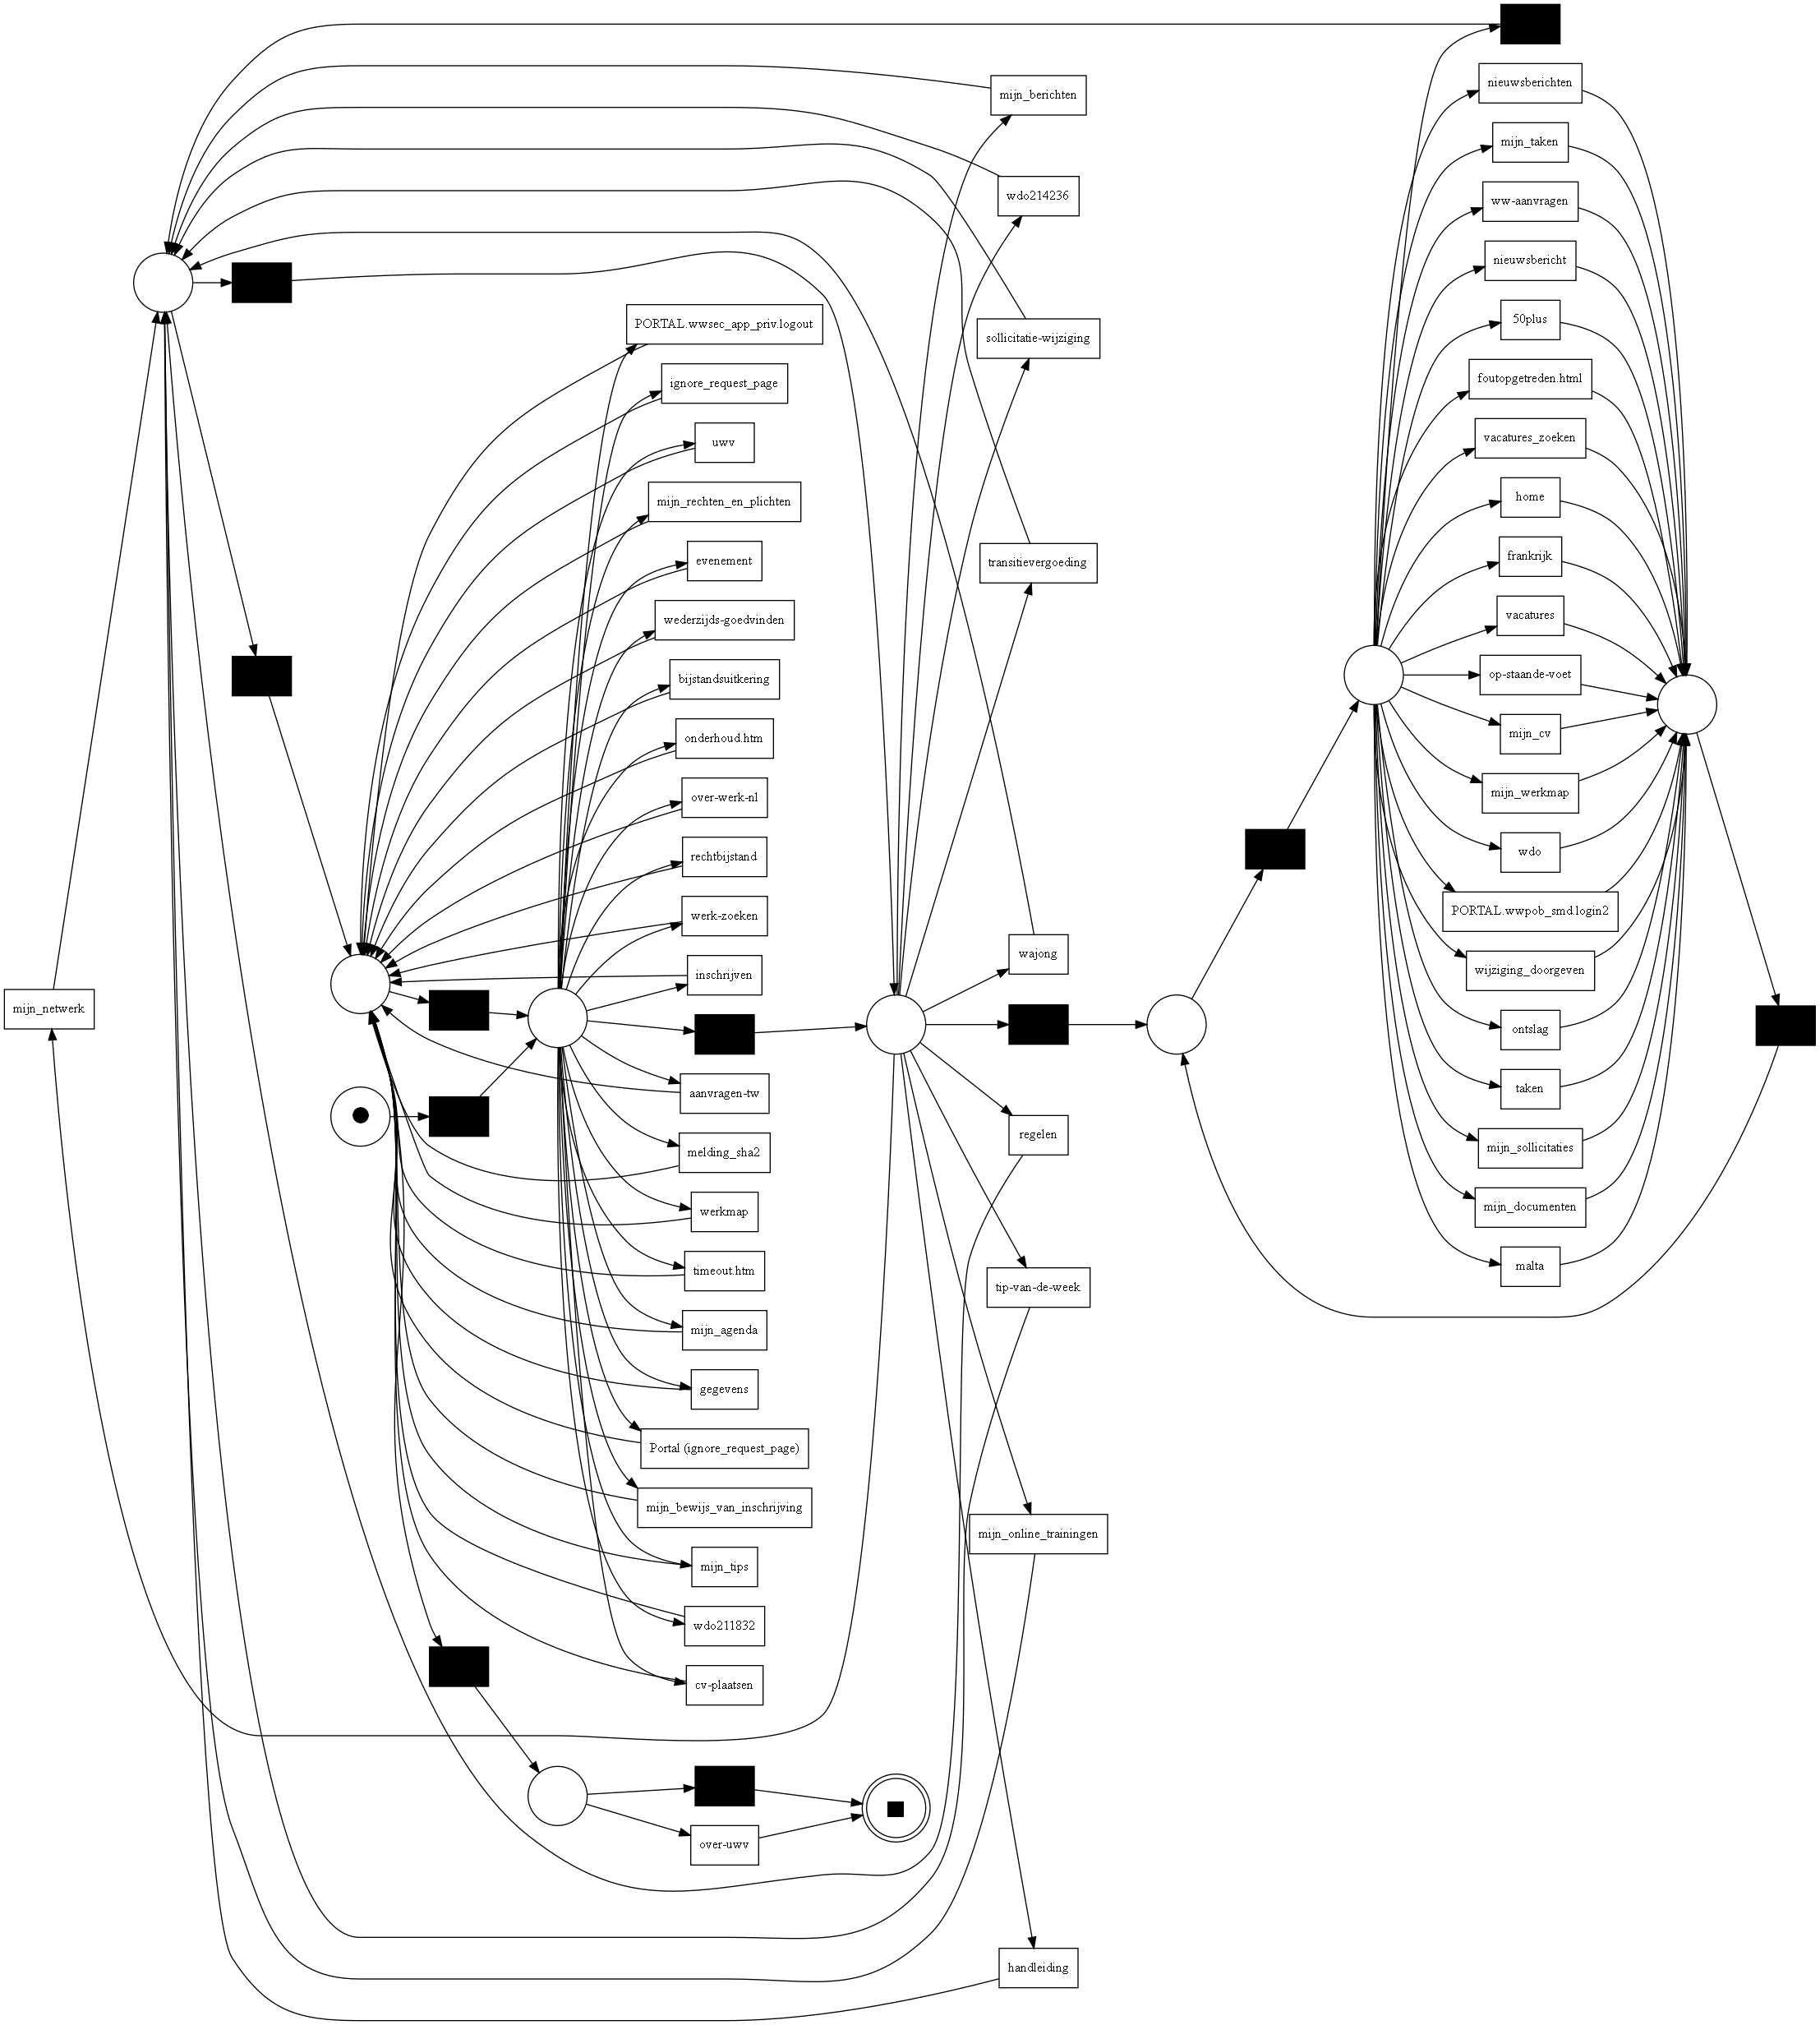

In [15]:
from pm4py import discover_petri_net_inductive as inductive

net, im, fm = inductive(eventlog)

pm4py.view_petri_net(net, im, fm)

- Filtering Variant

    - **Trace** : 각 CaseID가 거쳐간 Activity들의 집합
    - **Variant** 수많은 CaseID가 포함되어있는 Event Log에서 동일한 Trace를 따르는 Case들이 따라가는 해당 Trace

- Top 45개의 Variant Filtering

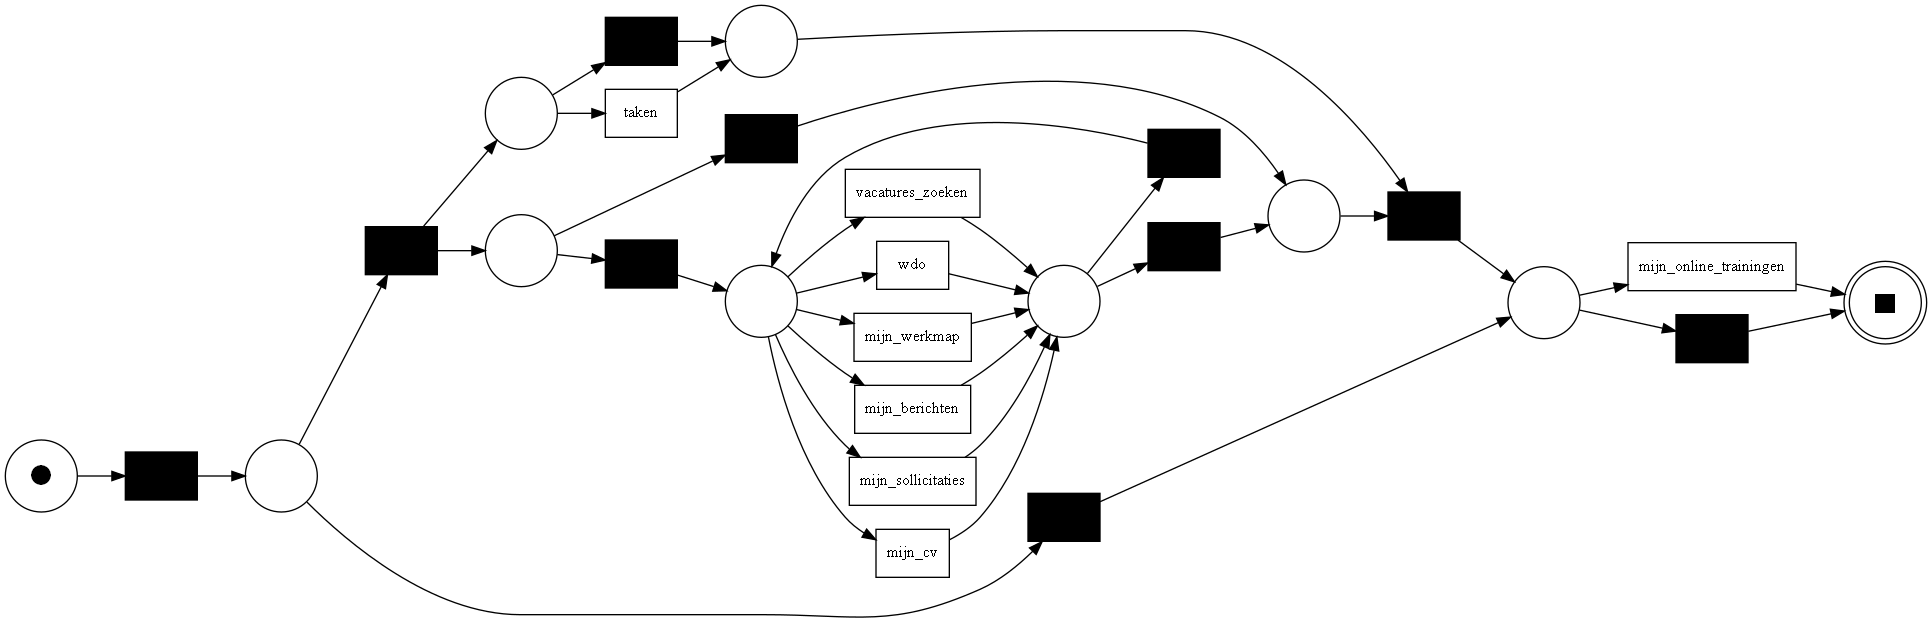

In [18]:
top45 = pm4py.filter_variants_top_k(eventlog, k=45)

net, im, fm = inductive(top45)

pm4py.view_petri_net(net, im, fm)

> 실습2>top 25개의 Variant로 필터링


### Advanced Filtering

- Filtering Activity

In [20]:
start_activities = pm4py.get_start_activities(eventlog)
print(start_activities)

end_activities = pm4py.get_end_activities(eventlog)
print(end_activities)

{'vacatures_zoeken': 3956, 'taken': 2673, 'mijn_werkmap': 2115, 'wdo': 1455, 'mijn_berichten': 1084, 'mijn_cv': 1017, 'mijn_sollicitaties': 594, 'mijn_online_trainingen': 509, 'mijn_bewijs_van_inschrijving': 267, 'foutopgetreden.html': 205, 'sollicitatie-wijziging': 174, 'wijziging_doorgeven': 169, 'home': 164, 'timeout.htm': 162, 'Portal (ignore_request_page)': 147, 'mijn_documenten': 141, 'inschrijven': 104, 'mijn_rechten_en_plichten': 43, 'wdo211832': 37, 'mijn_tips': 35, 'handleiding': 33, 'mijn_agenda': 30, 'mijn_netwerk': 22, 'werk-zoeken': 14, 'PORTAL.wwsec_app_priv.logout': 12, 'tip-van-de-week': 10, 'wederzijds-goedvinden': 7, 'over-werk-nl': 5, 'evenement': 4, 'onderhoud.htm': 4, 'uwv': 3, 'cv-plaatsen': 3, 'bijstandsuitkering': 2, 'regelen': 2, 'gegevens': 2, 'melding_sha2': 1, 'rechtbijstand': 1, 'werkmap': 1, 'ignore_request_page': 1, 'aanvragen-tw': 1, 'transitievergoeding': 1, 'wajong': 1, 'wdo214236': 1}
{'taken': 4664, 'vacatures_zoeken': 2606, 'mijn_werkmap': 1630, 'm

Text(0.5, 1.0, 'End activity Distribution')

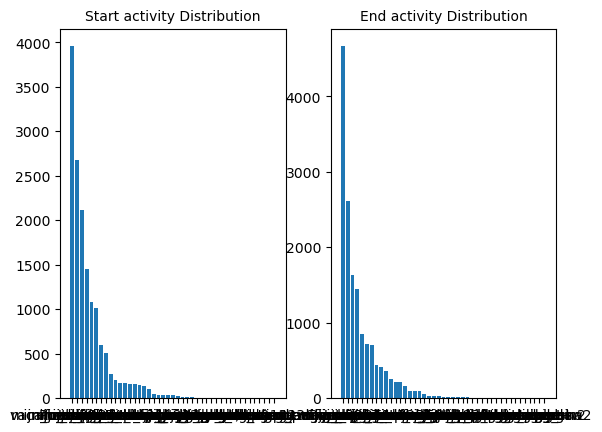

In [21]:
#Start activity와 End activity의 분포 barchart
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=1, ncols=2)
ax=ax.ravel()
ax[0].bar(x=list(start_activities.keys()),height=list(start_activities.values()))
ax[0].set_title("Start activity Distribution",fontsize=10)
ax[1].bar(x=list(end_activities.keys()),height=list(end_activities.values()))
ax[1].set_title("End activity Distribution",fontsize=10)

In [23]:
# 첫 activity가 'wdo'인 케이스
wdo_events = pm4py.filter_start_activities(eventlog,activities=['wdo'])
wdo_events.head(3)

,CustomerID,PAGE_NAME,TIMESTAMP,AgeCategory_x,Gender_x,ComplaintTopicID,case:concept:name,concept:name,time:timestamp,@@index
40,1002890,wdo,2015-09-28 14:28:55.887,50-65,M,33.0,1002890,wdo,2015-09-28 14:28:55.887,40
41,1002890,vacatures_zoeken,2015-10-12 15:11:00.043,50-65,V,58.0,1002890,vacatures_zoeken,2015-10-12 15:11:00.043,41
42,1002890,taken,2015-11-03 22:52:57.893,30-39,M,31.0,1002890,taken,2015-11-03 22:52:57.893,42


In [24]:
pm4py.get_start_activities(wdo_events)

{'wdo': 1455}

In [29]:
# 마지막 Activity가 'ignore_request_page'인 케이스
ignore_events = pm4py.filter_end_activities(eventlog, activities=['ignore_request_page'])
ignore_events.head(3)

,CustomerID,PAGE_NAME,TIMESTAMP,AgeCategory_x,Gender_x,ComplaintTopicID,case:concept:name,concept:name,time:timestamp,@@index
25402,2063028,Portal (ignore_request_page),2015-08-23 21:36:38.940,40-49,V,61.0,2063028,Portal (ignore_request_page),2015-08-23 21:36:38.940,25402
25403,2063028,mijn_werkmap,2015-08-23 21:48:13.890,30-39,V,67.0,2063028,mijn_werkmap,2015-08-23 21:48:13.890,25403
25404,2063028,vacatures_zoeken,2015-08-25 11:40:56.487,40-49,M,2.0,2063028,vacatures_zoeken,2015-08-25 11:40:56.487,25404


In [30]:
pm4py.get_end_activities(ignore_events)

{'ignore_request_page': 2}

> 실습3> 첫 Activity가 'taken'인 케이스와 그 갯수

In [25]:
taken_events = pm4py.filter_start_activities(eventlog,activities=['taken'])
taken_events.head(3)

,CustomerID,PAGE_NAME,TIMESTAMP,AgeCategory_x,Gender_x,ComplaintTopicID,case:concept:name,concept:name,time:timestamp,@@index
0,1000178,taken,2016-01-07 01:30:16.967,50-65,M,20.0,1000178,taken,2016-01-07 01:30:16.967,0
1,1000184,taken,2015-07-29 10:25:07.700,18-29,M,20.0,1000184,taken,2015-07-29 10:25:07.700,1
2,1000184,mijn_bewijs_van_inschrijving,2015-10-21 08:39:50.823,30-39,M,62.0,1000184,mijn_bewijs_van_inschrijving,2015-10-21 08:39:50.823,2


In [26]:
pm4py.get_start_activities(taken_events)

{'taken': 2673}

In [ ]:
pm4py.filter_time_range()

In [ ]:
from pm4py import discover_petri_net_alpha as alpha
from pm4py import discover_petri_net_inductive as inductive
from pm4py import discover_petri_net_heuristics as heuristics

In [ ]:
pm4py.view_dfg()

In [ ]:
pm4py.discover_performance_dfg
pm4py.discover_directly_follows_graph

pm4py.view_heuristics_net(,)

In [ ]:
pm4py.view_heuristics_net(net)

In [ ]:
pm4py.visualization.heuristics_net.visualizer.apply()

In [ ]:
pm4py.convert_to_dataframe()